Importamos librerias

In [1]:
import pyRofex as pyRofex
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt

# Import Data

## Log in

Hacemos el Login para poder traer datos de la API de Rofex

In [2]:
pyRofex.initialize(user="luciomassimi3968",
                   password="feulrX6%",
                   account="REM3968",
                   environment=pyRofex.Environment.REMARKET)

## Spot

Seteamos los parametros para traer datos del spot.

In [3]:
tickers_spot = ['GGAL.BA','PAMP.BA','YPFD.BA','ARS=X']

start = datetime.datetime(2022,1,1) # Starting date in format (year,month,day)
end = datetime.datetime.today() # Ending date

In [4]:
# spot_df = pd.DataFrame()
# for ticker in tickers_spot:
#     """
#     This will make a dataframe with the "Close" of each of our stocks
#     """
#     spot_df[ticker] = yf.Ticker(ticker).history(start=end,end=end)['Close']

# spot_df.columns =['GGAL','PAMP','YPFD','DLR']
# spot_df.tail()

In [5]:
spot_df = pd.DataFrame()
for ticker in tickers_spot:
    """
    This will make a dataframe with the "Close" of each of our stocks
    """
    spot_df[ticker] = yf.Ticker(ticker).history(start=start,end=end)['Close']

spot_df.columns =['GGAL','PAMP','YPFD','DLR']
spot_df.tail()

,GGAL,PAMP,YPFD,DLR
Date,,,,
2022-01-20,195.699997,164.850006,877.349976,104.201080
2022-01-21,189.399994,166.250000,851.650024,104.261841
2022-01-24,181.550003,163.800003,826.200012,104.350235
2022-01-25,197.899994,176.050003,889.599976,104.485275
2022-01-26,202.399994,174.750000,912.000000,104.699997


In [6]:
# spot.T.iloc[:,-1]

In [7]:
spot_last= spot_df.iloc[-1]
spot_last

GGAL    202.399994
PAMP    174.750000
YPFD    912.000000
DLR     104.699997
Name: 2022-01-26 00:00:00, dtype: float64

## Futures

### Import GGAL, PAMP, YFD, DLR/FUT

Seteamos los tickers de los activos que queremos traer, en este caso traemos los futuros de GGAL, PAMP, YFD, y todos los futuros DLR/FUT de 2022

In [8]:
futuros_dolar=['DLR/ENE22','DLR/FEB22','DLR/MAR22','DLR/ABR22','DLR/MAY22','DLR/JUN22','DLR/JUL22','DLR/AGO22','DLR/SEP22','DLR/OCT22','DLR/NOV22']#,'DLR/DIC22']
futuro_ggal=['GGAL/FEB22']
futuro_pamp=['PAMP/FEB22']
futuro_ypfd=['YPFD/FEB22']

tickers= futuros_dolar  + futuro_pamp + futuro_ypfd + futuro_ggal
depth=5

Usamos la funcion 'get_market_data' para traer la data de la rest API de rofex, y la almacenamos en un diccionario para luego poder extraer los datos que necesitemos

In [9]:
resp_dict = {}

for instrument in tickers:
    resp_dict[f"{instrument}"] = pyRofex.get_market_data(ticker = instrument, depth = depth)
    
resp_dict

{'DLR/ENE22': {'status': 'OK',
  'marketData': {'EV': 3705983800.0,
   'SE': {'price': 116.0, 'size': None, 'date': 1630281600000},
   'LA': {'price': 105.11, 'size': 100, 'date': 1643219807784},
   'OF': [{'price': 105.11, 'size': 100}],
   'BI': [{'price': 105.09, 'size': 4097},
    {'price': 105.0, 'size': 3},
    {'price': 104.43, 'size': 1000},
    {'price': 103.72, 'size': 205},
    {'price': 103.54, 'size': 1000}],
   'HI': 108.0,
   'LO': 105.1,
   'TV': 35061.0,
   'CL': {'price': 106.41, 'size': None, 'date': 1643068800000},
   'NV': 35061000,
   'OP': 105.2,
   'OI': {'price': None, 'size': 103485, 'date': 1630195200000},
   'IV': None},
  'depth': 5,
  'aggregated': True},
 'DLR/FEB22': {'status': 'OK',
  'marketData': {'EV': 27991620.0,
   'SE': {'price': 120.4, 'size': None, 'date': 1630281600000},
   'LA': {'price': 108.66, 'size': 9, 'date': 1643217785391},
   'OF': [{'price': 108.69, 'size': 124},
    {'price': 108.75, 'size': 774},
    {'price': 109.21, 'size': 124},


### BID - OFFER per instrument

Del diccionario de datos que creamos a partir del query, extraemos los precios del BID y OFFER de los distintos activos. A veces como la liquidez es muy limitada, no hay puntas en el BID ni en el OFFER. Por esto tambien agregue un nested "try - Except" por si es totalmente necesario traer algun dato. Esto a la hora de tradear o correr el bot no deberia hacerse, y solo se deberian tomar los datos de BID y OFFER. En este caso lo hago para que se vean mas datos cuando se corre la notebook.

In [10]:
# #BID
# bid={}
# for instrument in tickers:
#     try:
#         bid[instrument] = resp_dict[instrument]['marketData']['BI'][0]['price']
#     except:
#         print(f"{instrument} has no BID")
#         bid[instrument] = np.nan

# bid

In [11]:
#BID
bid={}
for instrument in tickers:
    #Trato de traer los valores del precio
    try:
        bid[instrument] = resp_dict[instrument]['marketData']['BI'][0]['price']
    
    #si no trae valores de precio y necesito probar algo de las funciones que siguen, puedo tratar de importar los
    #datos del cierre o del ultimo precio
    except:
#         try:
#             print(f"{instrument} has no BID")
#             bid[instrument] = resp_dict[instrument]['marketData']['LA'][0]['price']
            
#         except:
#             try:
#                 bid[instrument] = resp_dict[instrument]['marketData']['CL']['price']
        
#             except:
                print(f"{instrument} has no BID")
                bid[instrument] = np.nan

bid

GGAL/FEB22 has no BID


{'DLR/ENE22': 105.09,
 'DLR/FEB22': 108.67,
 'DLR/MAR22': 114.24,
 'DLR/ABR22': 119.01,
 'DLR/MAY22': 124.1,
 'DLR/JUN22': 129.2,
 'DLR/JUL22': 133.55,
 'DLR/AGO22': 138.45,
 'DLR/SEP22': 143.31,
 'DLR/OCT22': 147.85,
 'DLR/NOV22': 152.7,
 'PAMP/FEB22': 178.8,
 'YPFD/FEB22': 932.05,
 'GGAL/FEB22': nan}

In [12]:
# #OFFER
# offer={}
# for instrument in tickers:
#     try:
#         offer[instrument] = resp_dict[instrument]['marketData']['OF'][0]['price']
#     except:
#         print(f"{instrument} has no OFFER")
#         offer[instrument] = np.nan

# offer

In [13]:
#OFFER
offer={}
for instrument in tickers:
    #Trato de traer los valores del precio
    
    try:
        offer[instrument] = resp_dict[instrument]['marketData']['OF'][0]['price']
        
    except:
        
        #si no trae valores de precio y necesito probar algo de las funciones que siguen, puedo tratar de importar los
        #datos del cierre o del ultimo precio
#         try:
#             print(f"{instrument} has no OFFER")
#             offer[instrument] = resp_dict[instrument]['marketData']['LA'][0]['price']
            
#         except:
#             try:
#                 offer[instrument] = resp_dict[instrument]['marketData']['CL']['price']
        
#             except:
                print(f"{instrument} has no OFFER")
                offer[instrument] = np.nan

offer

GGAL/FEB22 has no OFFER


{'DLR/ENE22': 105.11,
 'DLR/FEB22': 108.69,
 'DLR/MAR22': 114.26,
 'DLR/ABR22': 119.04,
 'DLR/MAY22': 124.22,
 'DLR/JUN22': 129.23,
 'DLR/JUL22': 133.85,
 'DLR/AGO22': 139.88,
 'DLR/SEP22': 143.9,
 'DLR/OCT22': 150.0,
 'DLR/NOV22': 153.6,
 'PAMP/FEB22': 179.3,
 'YPFD/FEB22': 933.35,
 'GGAL/FEB22': nan}

Creo el dataframe con los valores de BID y OFFER para cada uno de los activos que pido

In [14]:
fut = pd.DataFrame({"bid":bid,"offer":offer})
fut

,bid,offer
DLR/ENE22,105.09,105.11
DLR/FEB22,108.67,108.69
DLR/MAR22,114.24,114.26
DLR/ABR22,119.01,119.04
DLR/MAY22,124.10,124.22
DLR/JUN22,129.20,129.23
DLR/JUL22,133.55,133.85
DLR/AGO22,138.45,139.88
DLR/SEP22,143.31,143.90
DLR/OCT22,147.85,150.00


Si es necesario, se puede agregar la comision de compra y venta para el futuro para saber cuales serian las tasas reales en caso de operar
(lo mismo se deberia hacer para el spot)

In [15]:
#comision
# comision = .005

# fut['offer']=fut['offer']*(1+comision)
# fut['bid']=fut['bid']*(1-comision)
# fut

# Modify Data

## Defining functions: 

### Tasas

Creamos distintas funciones para obtener la tasa. La tasa va a variar dependiendo si usamos tasa de compounding continuo(que es lo que se suele usar en derivados), si se calcula TNA, TEA, etc. Para esto se crea una funcion que engloba a todas las otras funciones, y cambiando la variable "TIPO" vamos a poder elegir entre una u otra. Tambien se puede seleccionar el input temporal como dia o mes de ser necesario

In [16]:
spot_v=100
future_v=105
dias=30
mes=1

Tasa de compounding continuo, gralmente usada para derivados.

In [17]:
def tasa_continua_mes(spot,future,t=1):
    tasa=np.log(future/spot) / (t/12)
    return(tasa)

tasa_continua_mes(spot_v,future_v,mes)

0.5854819700331846

In [18]:
def tasa_continua_dias(spot,future,t=30):
    tasa=np.log(future/spot) / (t/365)
    return(tasa)

tasa_continua_dias(spot_v,future_v,dias)

0.5936136640614232

Tasa Nocional Anual, el equivalente seria la tasa que se ve en los plazo fijos

In [19]:
def tasa_tna_mes(spot,future,t=1):
    tasa=((future/spot)-1)*(12/t)
    return(tasa)

tasa_tna_mes(spot_v,future_v,mes)

0.6000000000000005

In [20]:
def tasa_tna_dias(spot,future,t=30):
    tasa=((future/spot)-1)*(365/t)
    return(tasa)

tasa_tna_dias(spot_v,future_v,dias)

0.6083333333333338

Tasa Efectiva Anual, es la tasa 'REAL' que estariamos percibiendo en el ano. La diferencia con la nocional, es que la nocional no toma en cuenta el compounding y en esta si se tiene en cuenta. 
Por ej, si ponemos un plazo fijo con TNA 30% a un ano, 100>130. Pero si en vez de ponerla a un ano se pone a la misma tasa TNA 30% pero cada mes, al final del ano se va a tener >130 ya que cada mes se va a tener un poco de retorno y ese retorno tambien se va a colocar. Por eso la TEA > TNA

In [21]:
def tasa_tea_mes(spot,future,t=30):
    tasa=((future/spot)**(12/t))-1
    return(tasa)

tasa_tea_mes(spot_v,future_v,mes)

0.7958563260221301

In [22]:
def tasa_tea_dias(spot,future,t=30):
    tasa=((future/spot)**(365/t))-1
    return(tasa)

tasa_tea_dias(spot_v,future_v,dias)

0.8105192164554333

La tasa directa es el % real sin anualizar

In [23]:
def tasa_directa(spot,future):
    tasa=(future/spot)-1
    return(tasa)

tasa_directa(spot_v,future_v)

0.050000000000000044

In [24]:
spot_v, future_v

(100, 105)

Esta funcion toma todas las otras funciones calculadoras de tasa y las junta en una sola para que sea mas simple seleccionar la tasa que se quiere usar. En vez de cambiar todas las funciones, se puede poner una variable como 'tipo' antes de correr las funciones y seleccionar el tipo de tasa que se quiere usar de esa manera. Cumpliria la funcion de 'switch'

In [25]:
# def tipo_tasa(tipo,period,spot,future,t=1):
    
#     if tipo.lower()== "continua":
        
#         if period.lower()=="mes":
#             return(tasa_continua_mes(spot,future,t))
        
#         elif period.lower()=="dias":
#             return(tasa_continua_dias(spot,future,t))
        
#         else:
#             print("Options: mes, dias")
            
            
#     elif tipo.lower()== "tna":
        
#         if period.lower()=="mes":
#             return(tasa_tna_mes(spot,future,t))
        
#         elif period.lower()=="dias":
#             return(tasa_tna_dias(spot,future,t))
        
#         else:
#             print("Options: mes, dias")
        
        
#     elif tipo.lower()== "tea":
        
#         if period.lower()=="mes":
#             return(tasa_tea_mes(spot,future,t))
        
#         elif period.lower()=="dias":
#             return(tasa_tea_dias(spot,future,t))
        
#         else:
#             print("Options: mes, dias")

In [26]:
def tipo_tasa(spot,future,t=30,tipo="continua",period="dias"):
    
    if tipo.lower()== "continua":
        
        if period.lower()=="mes":
            return(tasa_continua_mes(spot,future,t))
        
        elif period.lower()=="dias":
            return(tasa_continua_dias(spot,future,t))
        
        else:
            print("Options: mes, dias")
            
            
    elif tipo.lower()== "tna":
        
        if period.lower()=="mes":
            return(tasa_tna_mes(spot,future,t))
        
        elif period.lower()=="dias":
            return(tasa_tna_dias(spot,future,t))
        
        else:
            print("Options: mes, dias")
        
        
    elif tipo.lower()== "tea":
        
        if period.lower()=="mes":
            return(tasa_tea_mes(spot,future,t))
        
        elif period.lower()=="dias":
            return(tasa_tea_dias(spot,future,t))
        
        else:
            print("Options: mes, dias")
            
    elif tipo.lower()== 'directa':
        return(tasa_directa(spot,future))
    
    else:
        return("Error")

In [27]:
# spot_v=104.261841
# future_v=105.28
# dias=10
# mes=(10/30)

# tipo_tasa(spot_v,future_v)

In [28]:
# spot_v=104.261841
# future_v=105.28
# dias=10
# mes=(10/30)

# tipo_tasa(spot=spot_v,
#           future=future_v,
#           t=dias,
#           tipo='directa',
#           period='dias')

### Days until settlement

Es importante tener en cuenta que al calcular las tasas de manera diaria se tienen que usar los dias exactos desde que se hace la transaccion hasta el dia del settlement. Generalmente el settlement se da el ultimo dia habil del mes de vencimiento de futuro, pero esto no siempre va a coincidir con el ultimo dia real del mes. Es por esto que tener una funcion que calcula los dias exactos hasta el ultimo dia habil del mes o settlement, es muy importante porque con este input se puede calcular la tasa correcta.

In [29]:
import calendar
from datetime import date

#Calculo el ultimo dia habil del mes, teniendo ano y mes como input.
#De la ultima semana del mes, toma el maximo dia de entre 0:5(lun-vier)
def last_business_day_in_month(year: int, month: int):
    return(date(year,month,max(calendar.monthcalendar(year, month)[-1:][0][:5])))

#Calculo el ultimo dia habil del mes, tomamos la ecuacion anterior
def days_until_last_business_day(year:int,month:int):
    
    delta = last_business_day_in_month(year,month) - date.today()
    return(delta.days)   

days_until_last_business_day(2022,2)

33

###  Bid - Offer Rates

Tomo las funciones creadas anteriormente para calcular las tasas tomadoras y colocadoras usando los datos del spot y futuros importados

In [30]:
#Final DataFrame
tasas_anuales_bid_offer =pd.DataFrame(columns=['bid','offer'])


#List variables
month_list= ['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic']
activo_tipo_list = ['DLR', 'GGAL','PAMP','YPFD']
activo_ano_list = ['22','23']
ano_list=[2022,2023]


# Function variables> elijo el tipo de tasa que se va a calcular
tipo='continua'
period='dias'


## Itero con las columnas'bid' y 'offer' del dataframe final
for column in tasas_anuales_bid_offer:
    ind=0
#     print("\n",column,"\n")
    
    ## Itero y tomo cada dato de 'bid' y 'offer', se usan los datos de los precios de los futuros
    for data in fut[column]:
#         print(f"data {data}")
        
        ## Itero para saber a que ano pertenece el futuro
        for ano_activo in activo_ano_list:
            
            ## Corroboro si el ano esta en el indice del precio a traer, y seteo el ano correspondiente
            ## para usar en la formula que calcula los dias hasta el settlement
            if ano_activo in fut[column].index[ind]:
                year=ano_list[activo_ano_list.index(ano_activo)]

#                 print(fut[column].index[ind])
                
                ## Corroboro el tipo de activo de donde viene la data, DLR,GGAL,PAMP o YPFD
                for tipo_activo in activo_tipo_list:

                    if tipo_activo in fut[column].index[ind]:
                        
                        ## Establezco el mes correspondiente a la data
                        for mes in month_list:


                            if mes in fut[column].index[ind].lower():
#                                 print(f"Mes: {mes}")

                                ## Teniendo el el precio del futuro,el ano y mes de settlement, y el tipo de activo 
                                ## del que quiero calcular la tasa, puedo traer el valor del spot, calcular los dias
                                ## hasta el settlement y calcular la tasa
            
                                #dataframe
                                index= fut[column].index[ind]
                                column= column

                                #function
                                spot= spot_df.iloc[-1][tipo_activo]
                                future= data
                                month = month_list.index(mes)+1


                                #output
                                tasas_anuales_bid_offer.loc[index,column] = round(tipo_tasa(spot=spot,
                                                                                      future=future,
                                                                                      t=days_until_last_business_day(year,month),
                                                                                      tipo=tipo,
                                                                                      period=period),6)
#                                 print(f"Tipo Activo: {tipo_activo}")
#                                 print(f"Spot: {spot}")
#                                 print(f"Future: {future}")
#                                 print(f"Year: {year}")
#                                 print(f"Month count: {month}")
#                                 print(f"Dias faltan: {days_until_last_business_day(year,month)}")
#                                 print(f"Tipo: {tipo}")
#                                 print(f"Periodo: {period}")
#                                 print(f"Tasa: {tasas_anuales_bid_offer.loc[index,column]}\n")

#             else:
#                 print(f"Other Year {ano_activo}")
                
#         print(f"Ind: {ind}\n")
        ind+=1

            
# tasas_anuales_bid_offer

Tasa colocadora: bid, Tasa tomadora: offer

In [31]:
# tasas_anuales_bid_offer

In [32]:
# arbitraje_dict={}
# count=0
# for offer in tasas_anuales_bid_offer['offer']:
#     for bid in tasas_anuales_bid_offer['bid']:
#         if bid>offer:
#             print(f"Bid: {tasas_anuales_bid_offer[tasas_anuales_bid_offer['bid'] == bid].index[0]} {bid},\nOffer: {tasas_anuales_bid_offer[tasas_anuales_bid_offer['offer'] == offer].index[0]} {offer}\n")
#             arbitraje_dict.update({f"{tasas_anuales_bid_offer[tasas_anuales_bid_offer['bid'] == bid].index[0]}-{count}": (bid, (tasas_anuales_bid_offer[tasas_anuales_bid_offer['offer'] == offer].index[0], offer))})
#             count+=1

In [33]:
# arbitraje_dict

In [34]:
# arbitraje_df = pd.DataFrame(arbitraje_dict).T.sort_index()
# arbitraje_df.columns = ['bid','offer']
# arbitraje_df

# Websocket


In [35]:
instrument = tickers

In [36]:
prices = pd.DataFrame(columns=["activo", "bid", "offer", "last"])
prices.set_index('activo', inplace=True)

In [37]:
def tasas_futuros(df):
    
    #Final DataFrame
    tasas_anuales_bid_offer =pd.DataFrame(columns=['bid','offer'])


    #List variables
    month_list= ['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic']
    activo_tipo_list = ['DLR', 'GGAL','PAMP','YPFD']
    activo_ano_list = ['22','23']
    ano_list=[2022,2023]


    # Function variables> elijo el tipo de tasa que se va a calcular
    tipo='continua'
    period='dias'


    ## Itero con las columnas'bid' y 'offer' del dataframe final
    for column in tasas_anuales_bid_offer:
        ind=0
    #     print("\n",column,"\n")

        ## Itero y tomo cada dato de 'bid' y 'offer', se usan los datos de los precios de los futuros
        for data in df[column]:
    #         print(f"data {data}")

            ## Itero para saber a que ano pertenece el futuro
            for ano_activo in activo_ano_list:

                ## Corroboro si el ano esta en el indice del precio a traer, y seteo el ano correspondiente
                ## para usar en la formula que calcula los dias hasta el settlement
                if ano_activo in df[column].index[ind]:
                    year=ano_list[activo_ano_list.index(ano_activo)]

    #                 print(df[column].index[ind])

                    ## Corroboro el tipo de activo de donde viene la data, DLR,GGAL,PAMP o YPFD
                    for tipo_activo in activo_tipo_list:

                        if tipo_activo in df[column].index[ind]:

                            ## Establezco el mes correspondiente a la data
                            for mes in month_list:


                                if mes in df[column].index[ind].lower():
    #                                 print(f"Mes: {mes}")

                                    ## Teniendo el el precio del futuro,el ano y mes de settlement, y el tipo de activo 
                                    ## del que quiero calcular la tasa, puedo traer el valor del spot, calcular los dias
                                    ## hasta el settlement y calcular la tasa

                                    #dataframe
                                    index= df[column].index[ind]
                                    column= column

                                    #function
                                    spot= spot_df.iloc[-1][tipo_activo]
                                    future= data
                                    month = month_list.index(mes)+1


                                    #output
                                    tasas_anuales_bid_offer.loc[index,column] = round(tipo_tasa(spot=spot,
                                                                                          future=future,
                                                                                          t=days_until_last_business_day(year,month),
                                                                                          tipo=tipo,
                                                                                          period=period),6)
    #                                 print(f"Tipo Activo: {tipo_activo}")
    #                                 print(f"Spot: {spot}")
    #                                 print(f"Future: {future}")
    #                                 print(f"Year: {year}")
    #                                 print(f"Month count: {month}")
    #                                 print(f"Dias faltan: {days_until_last_business_day(year,month)}")
    #                                 print(f"Tipo: {tipo}")
    #                                 print(f"Periodo: {period}")
    #                                 print(f"Tasa: {tasas_anuales_bid_offer.loc[index,column]}\n")

    #             else:
    #                 print(f"Other Year {ano_activo}")

    #         print(f"Ind: {ind}\n")
            ind+=1


    return(tasas_anuales_bid_offer)

In [38]:
def plot_prices(prices):
    plt.figure(figsize=(18,10))


    x = futuros_dolar
    y_bid = prices['bid'].loc[futuros_dolar]
    y_offer = prices['offer'].loc[futuros_dolar]
    y_last = prices['last'].loc[futuros_dolar]

    plt.plot(x,y_bid, color='red', marker='o', label='Bid')
    plt.plot(x,y_offer, color='green', marker='X', label='Offer')
    plt.plot(x,y_last, color='black', linestyle = 'dashed', alpha=0.5,label='last')
    # plt.scatter(tasas_futuros(prices.loc[['PAMP/FEB22', 'YPFD/FEB22', 'GGAL/FEB22']]),prices.loc[['PAMP/FEB22', 'YPFD/FEB22', 'GGAL/FEB22']])
    # plt.figsize()


    plt.title('Futuros')
    plt.xlabel('Future Contract')
    plt.ylabel('Precio')

    plt.legend()
    # plt.grid()
    plt.tight_layout()
    plt.show()

In [39]:
def plot_tasas(tasas_futuros_df):
    plt.figure(figsize=(18,10))
    plt.style.use('seaborn')

    x = futuros_dolar
    y_bid = tasas_futuros_df['bid'].loc[futuros_dolar]
    y_offer = tasas_futuros_df['offer'].loc[futuros_dolar]

    plt.plot(x,y_bid, color='red', marker='o', label='Bid')
    plt.plot(x,y_offer, color='green', marker='X', label='Offer')

    plt.title('Tasas Futuros')
    plt.xlabel('Future Contract')
    plt.ylabel('Tasa')

    plt.legend()
    # plt.grid()
    plt.tight_layout()
    plt.show()

In [40]:
def market_data_handler(message):
    global prices
    print("Market Data Message Received: {0}".format(message))
    last = None if not message["marketData"]["LA"] else message["marketData"]["LA"]["price"]
    prices.loc[message["instrumentId"]['symbol']] = [
        message["marketData"]["BI"][0]["price"],
        message["marketData"]["OF"][0]["price"],
        last
    ]
    
    display(prices)
    display(plot_prices(prices))
    
    tasas_futuros_df=tasas_futuros(prices)
    display(tasas_futuros_df)
    display(plot_tasas(tasas_futuros_df))
    
    arbitraje_tasas_df= arbitraje_tasas(tasas_futuros_df)
    display(arbitraje_tasas_df)
    

In [41]:
def arbitraje_tasas(df):
    arbitraje_dict={}
    count=0
    for offer in df['offer']:
        for bid in df['bid']:
            if bid>offer:
#                 print(f"Bid: {df[df['bid'] == bid].index[0]} {bid},\nOffer: {df[df['offer'] == offer].index[0]} {offer}\n")
                arbitraje_dict.update({f"{df[df['bid'] == bid].index[0]}-{count}": (bid, (df[df['offer'] == offer].index[0], offer))})
                count+=1
    arbitraje_df = pd.DataFrame(arbitraje_dict).T.sort_index()
    arbitraje_df.columns = ['bid','offer']
    arbitraje_df
    return(arbitraje_df)

In [42]:
pyRofex.init_websocket_connection(market_data_handler=market_data_handler)

In [43]:
# Subscribes to receive market data messages
pyRofex.market_data_subscription(
    tickers=instrument,
    entries=[
        pyRofex.MarketDataEntry.BIDS,
        pyRofex.MarketDataEntry.OFFERS,
        pyRofex.MarketDataEntry.LAST]
)

In [44]:
# pyRofex.close_websocket_connection()

Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042733, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/AGO22'}, 'marketData': {'BI': [{'price': 138.45, 'size': 200}], 'LA': {'price': 138.96, 'size': 10.0, 'date': 1643133611896}, 'OF': [{'price': 139.88, 'size': 5}]}}


,bid,offer,last
activo,,,
DLR/AGO22,138.45,139.88,138.96


Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042737, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/ABR22'}, 'marketData': {'BI': [{'price': 119.01, 'size': 300}], 'LA': {'price': 119.0, 'size': 9, 'date': 1643214891190}, 'OF': [{'price': 119.04, 'size': 300}]}}


,bid,offer,last
activo,,,
DLR/AGO22,138.45,139.88,138.96
DLR/ABR22,119.01,119.04,119.00


Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042737, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/FEB22'}, 'marketData': {'BI': [{'price': 108.67, 'size': 100}], 'LA': {'price': 108.66, 'size': 9, 'date': 1643217785391}, 'OF': [{'price': 108.69, 'size': 124}]}}


,bid,offer,last
activo,,,
DLR/AGO22,138.45,139.88,138.96
DLR/ABR22,119.01,119.04,119.00
DLR/FEB22,108.67,108.69,108.66


Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042774, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/JUN22'}, 'marketData': {'BI': [{'price': 129.2, 'size': 10}], 'LA': {'price': 129.0, 'size': 10, 'date': 1643216010049}, 'OF': [{'price': 129.23, 'size': 5}]}}


,bid,offer,last
activo,,,
DLR/AGO22,138.45,139.88,138.96
DLR/ABR22,119.01,119.04,119.00
DLR/FEB22,108.67,108.69,108.66
DLR/JUN22,129.20,129.23,129.00


<Figure size 1296x720 with 0 Axes>

Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042775, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/MAY22'}, 'marketData': {'BI': [{'price': 124.1, 'size': 400}], 'LA': {'price': 124.24, 'size': 3, 'date': 1643210332928}, 'OF': [{'price': 124.22, 'size': 2}]}}


,bid,offer,last
activo,,,
DLR/AGO22,138.45,139.88,138.96
DLR/ABR22,119.01,119.04,119.00
DLR/FEB22,108.67,108.69,108.66
DLR/JUN22,129.20,129.23,129.00
DLR/MAY22,124.10,124.22,124.24


<Figure size 1296x720 with 0 Axes>

Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042775, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'YPFD/FEB22'}, 'marketData': {'BI': [{'price': 932.05, 'size': 3}], 'LA': {'price': 933.35, 'size': 1, 'date': 1643220034124}, 'OF': [{'price': 933.35, 'size': 5}]}}


,bid,offer,last
activo,,,
DLR/AGO22,138.45,139.88,138.96
DLR/ABR22,119.01,119.04,119.00
DLR/FEB22,108.67,108.69,108.66
DLR/JUN22,129.20,129.23,129.00
DLR/MAY22,124.10,124.22,124.24
YPFD/FEB22,932.05,933.35,933.35


<Figure size 1296x720 with 0 Axes>

Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042775, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'GGAL/FEB22'}, 'marketData': {'BI': [], 'LA': None, 'OF': []}}
Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042775, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/NOV22'}, 'marketData': {'BI': [{'price': 152.7, 'size': 250}], 'LA': None, 'OF': [{'price': 153.6, 'size': 10}]}}


,bid,offer,last
activo,,,
DLR/AGO22,138.45,139.88,138.96
DLR/ABR22,119.01,119.04,119.00
DLR/FEB22,108.67,108.69,108.66
DLR/JUN22,129.20,129.23,129.00
DLR/MAY22,124.10,124.22,124.24
YPFD/FEB22,932.05,933.35,933.35
DLR/NOV22,152.70,153.60,NaN


Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042775, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/OCT22'}, 'marketData': {'BI': [{'price': 147.85, 'size': 200}], 'LA': {'price': 147.5, 'size': 2, 'date': 1643211359308}, 'OF': [{'price': 150.0, 'size': 500}]}}


,bid,offer,last
activo,,,
DLR/AGO22,138.45,139.88,138.96
DLR/ABR22,119.01,119.04,119.00
DLR/FEB22,108.67,108.69,108.66
DLR/JUN22,129.20,129.23,129.00
DLR/MAY22,124.10,124.22,124.24
YPFD/FEB22,932.05,933.35,933.35
DLR/NOV22,152.70,153.60,NaN
DLR/OCT22,147.85,150.00,147.50


In [45]:
# arbitraje_tasas(tasas_futuros(prices))

Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042775, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/JUL22'}, 'marketData': {'BI': [{'price': 133.55, 'size': 400}], 'LA': {'price': 130.0, 'size': 10.0, 'date': 1643115546426}, 'OF': [{'price': 133.85, 'size': 100}]}}


,bid,offer,last
activo,,,
DLR/AGO22,138.45,139.88,138.96
DLR/ABR22,119.01,119.04,119.00
DLR/FEB22,108.67,108.69,108.66
DLR/JUN22,129.20,129.23,129.00
DLR/MAY22,124.10,124.22,124.24
YPFD/FEB22,932.05,933.35,933.35
DLR/NOV22,152.70,153.60,NaN
DLR/OCT22,147.85,150.00,147.50
DLR/JUL22,133.55,133.85,130.00


Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042775, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/MAR22'}, 'marketData': {'BI': [{'price': 114.24, 'size': 790}], 'LA': {'price': 114.16, 'size': 9, 'date': 1643214958209}, 'OF': [{'price': 114.26, 'size': 1440}]}}


,bid,offer,last
activo,,,
DLR/AGO22,138.45,139.88,138.96
DLR/ABR22,119.01,119.04,119.00
DLR/FEB22,108.67,108.69,108.66
DLR/JUN22,129.20,129.23,129.00
DLR/MAY22,124.10,124.22,124.24
YPFD/FEB22,932.05,933.35,933.35
DLR/NOV22,152.70,153.60,NaN
DLR/OCT22,147.85,150.00,147.50
DLR/JUL22,133.55,133.85,130.00


Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042775, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/ENE22'}, 'marketData': {'BI': [{'price': 105.09, 'size': 4097}], 'LA': {'price': 105.11, 'size': 100, 'date': 1643219807784}, 'OF': [{'price': 105.11, 'size': 100}]}}


,bid,offer,last
activo,,,
DLR/AGO22,138.45,139.88,138.96
DLR/ABR22,119.01,119.04,119.00
DLR/FEB22,108.67,108.69,108.66
DLR/JUN22,129.20,129.23,129.00
DLR/MAY22,124.10,124.22,124.24
YPFD/FEB22,932.05,933.35,933.35
DLR/NOV22,152.70,153.60,NaN
DLR/OCT22,147.85,150.00,147.50
DLR/JUL22,133.55,133.85,130.00


<Figure size 1296x720 with 0 Axes>

Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042776, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/SEP22'}, 'marketData': {'BI': [{'price': 143.31, 'size': 100}], 'LA': None, 'OF': [{'price': 143.9, 'size': 100}]}}


,bid,offer,last
activo,,,
DLR/AGO22,138.45,139.88,138.96
DLR/ABR22,119.01,119.04,119.00
DLR/FEB22,108.67,108.69,108.66
DLR/JUN22,129.20,129.23,129.00
DLR/MAY22,124.10,124.22,124.24
YPFD/FEB22,932.05,933.35,933.35
DLR/NOV22,152.70,153.60,NaN
DLR/OCT22,147.85,150.00,147.50
DLR/JUL22,133.55,133.85,130.00


<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

In [46]:
# fut

None

,bid,offer
DLR/AGO22,0.469976,0.48726
DLR/ABR22,0.502791,0.50378
DLR/FEB22,0.411639,0.413674
DLR/JUN22,0.495134,0.495681
DLR/MAY22,0.496367,0.499189
YPFD/FEB22,0.240529,0.255945
DLR/NOV22,0.447215,0.454179
DLR/OCT22,0.453098,0.472053
DLR/JUL22,0.482786,0.487237
DLR/MAR22,0.497326,0.498325


Index(['DLR/ENE22', 'DLR/FEB22', 'DLR/MAR22', 'DLR/ABR22', 'DLR/MAY22',
       'DLR/JUN22', 'DLR/JUL22', 'DLR/AGO22', 'DLR/SEP22', 'DLR/OCT22',
       'DLR/NOV22', 'PAMP/FEB22', 'YPFD/FEB22', 'GGAL/FEB22'],
      dtype='object')

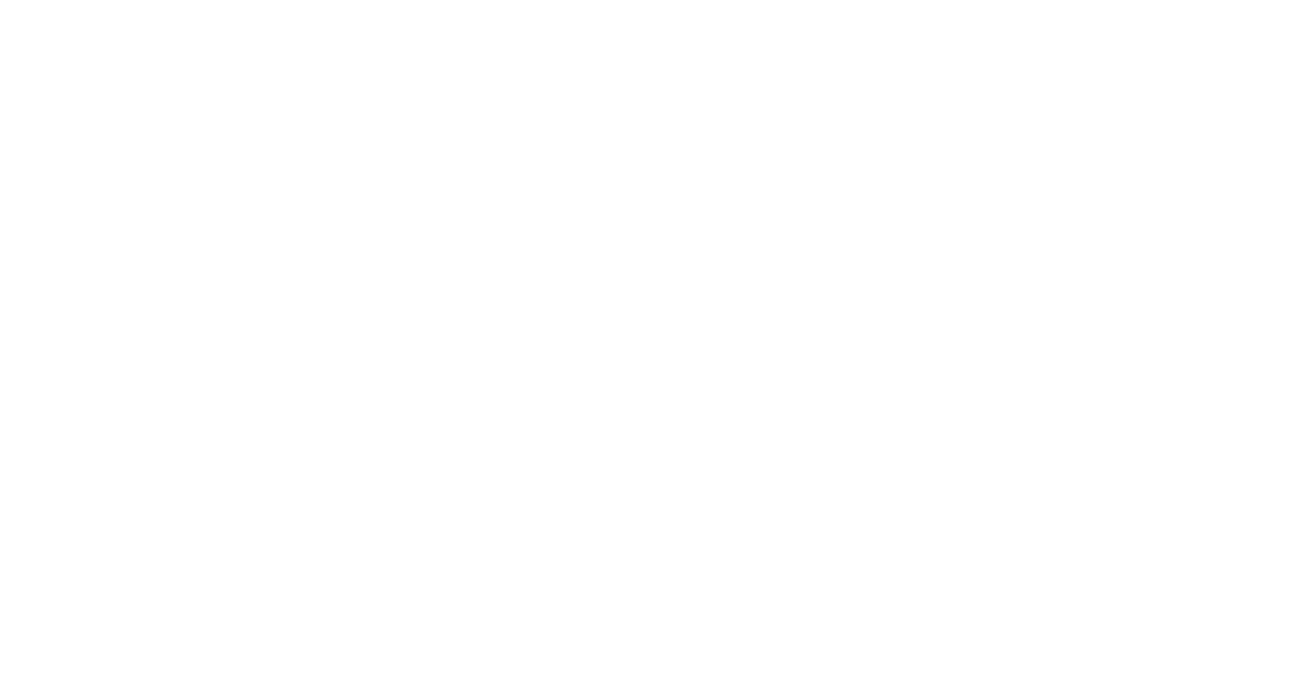

In [47]:
arbitrary_ordering = fut.index
arbitrary_ordering

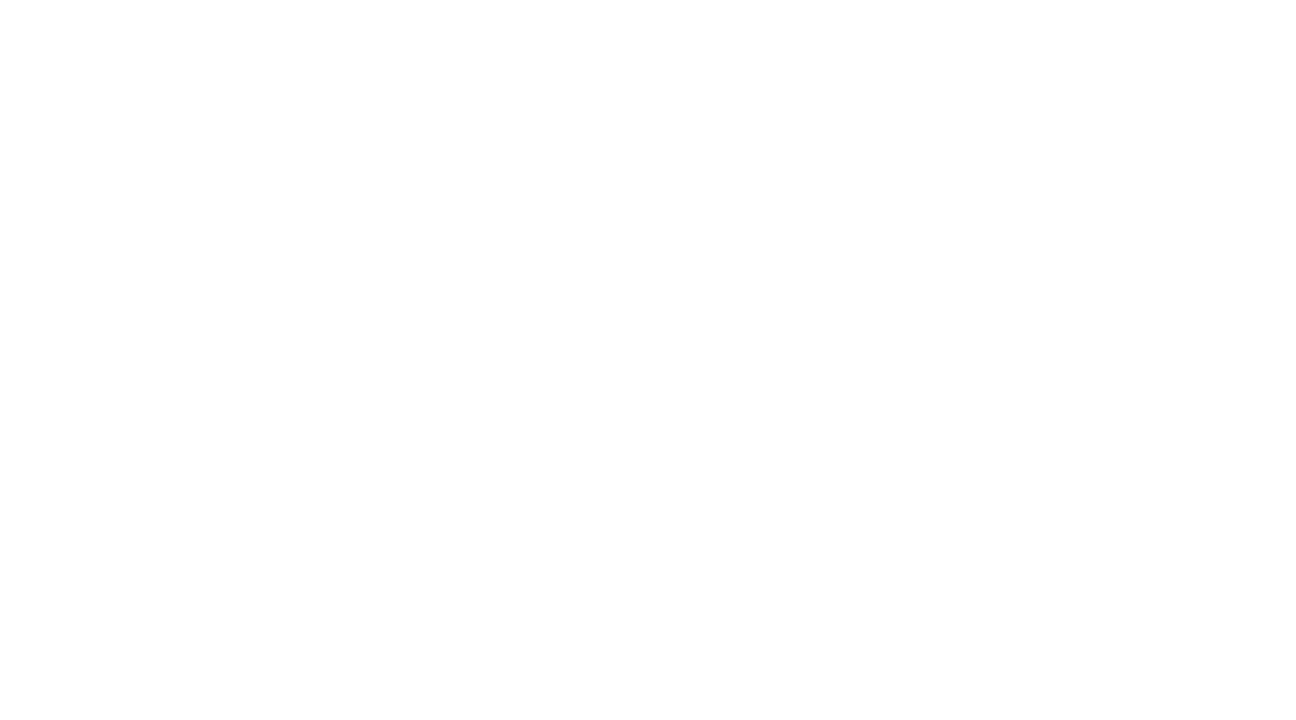

,bid,offer,last
DLR/ENE22,105.09,105.11,105.11
DLR/FEB22,108.67,108.69,108.66
DLR/MAR22,114.24,114.26,114.16
DLR/ABR22,119.01,119.04,119.00
DLR/MAY22,124.10,124.22,124.24
DLR/JUN22,129.20,129.23,129.00
DLR/JUL22,133.55,133.85,130.00
DLR/AGO22,138.45,139.88,138.96
DLR/SEP22,143.31,143.90,NaN
DLR/OCT22,147.85,150.00,147.50


None

,bid,offer
DLR/ABR22-0,0.502791,"(DLR/AGO22, 0.48726)"
DLR/ABR22-13,0.502791,"(DLR/JUN22, 0.495681)"
DLR/ABR22-16,0.502791,"(DLR/MAY22, 0.499189)"
DLR/ABR22-18,0.502791,"(YPFD/FEB22, 0.255945)"
DLR/ABR22-29,0.502791,"(DLR/NOV22, 0.454179)"
...,...,...
DLR/OCT22-9,0.453098,"(DLR/FEB22, 0.413674)"
DLR/SEP22-12,0.463877,"(DLR/FEB22, 0.413674)"
DLR/SEP22-27,0.463877,"(YPFD/FEB22, 0.255945)"
DLR/SEP22-34,0.463877,"(DLR/NOV22, 0.454179)"


In [48]:
prices=prices.reindex(arbitrary_ordering)
prices

Market Data Message Received: {'type': 'Md', 'timestamp': 1643220042776, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'PAMP/FEB22'}, 'marketData': {'BI': [{'price': 178.8, 'size': 4}], 'LA': {'price': 178.8, 'size': 6, 'date': 1643220002559}, 'OF': [{'price': 179.3, 'size': 10}]}}


,bid,offer,last
DLR/ENE22,105.09,105.11,105.11
DLR/FEB22,108.67,108.69,108.66
DLR/MAR22,114.24,114.26,114.16
DLR/ABR22,119.01,119.04,119.00
DLR/MAY22,124.10,124.22,124.24
DLR/JUN22,129.20,129.23,129.00
DLR/JUL22,133.55,133.85,130.00
DLR/AGO22,138.45,139.88,138.96
DLR/SEP22,143.31,143.90,NaN
DLR/OCT22,147.85,150.00,147.50


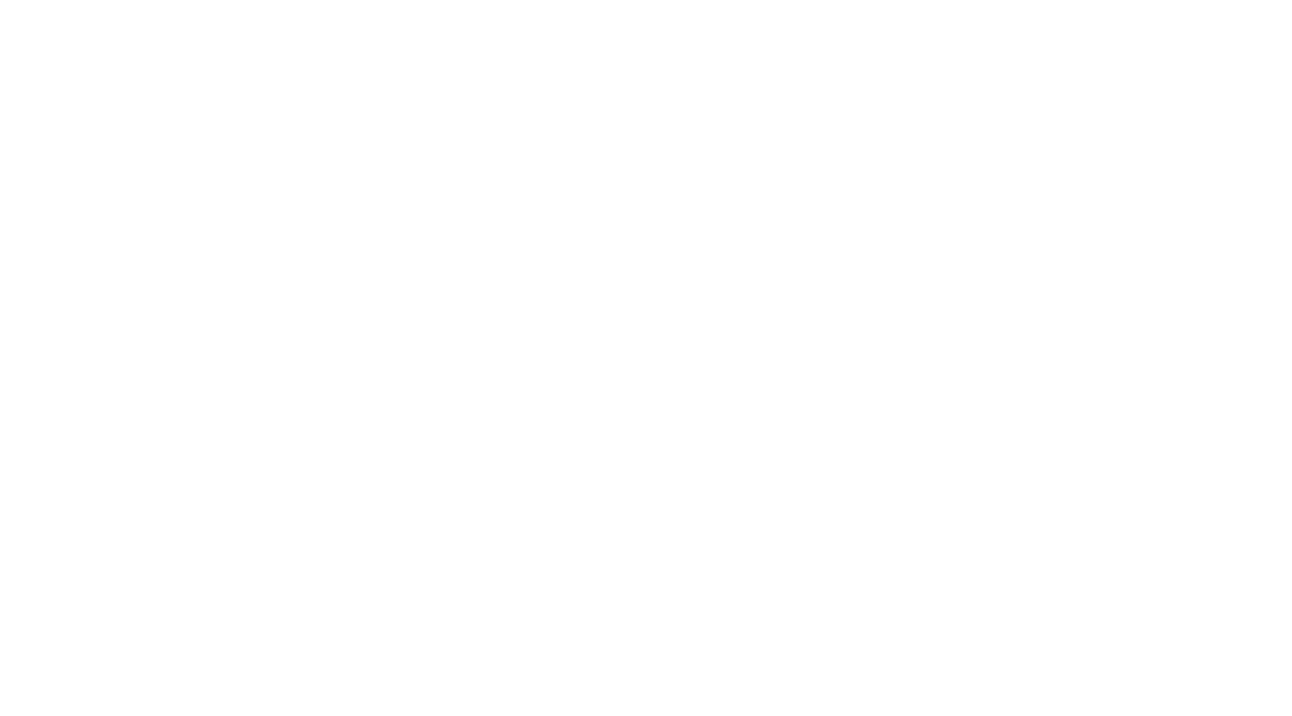

In [49]:
# plt.figure(figsize=(18,10))

# plt.title('Tasas Futuros')
# plt.xlabel('Future Contract')
# plt.ylabel('Tasa')
# x = tasas_futuros(prices).T.columns
# y_bid = tasas_futuros(prices)['bid']
# y_offer = tasas_futuros(prices)['offer']

# plt.scatter(x, y_bid, color='b', marker='x', linewidth=3,alpha=.8, label='Bid')
# plt.scatter(x, y_offer, color='r', marker='o',linewidth=3, alpha=.8, label='Offer')
# # plt.xticks(rotation=90)


# plt.legend()
# plt.show()

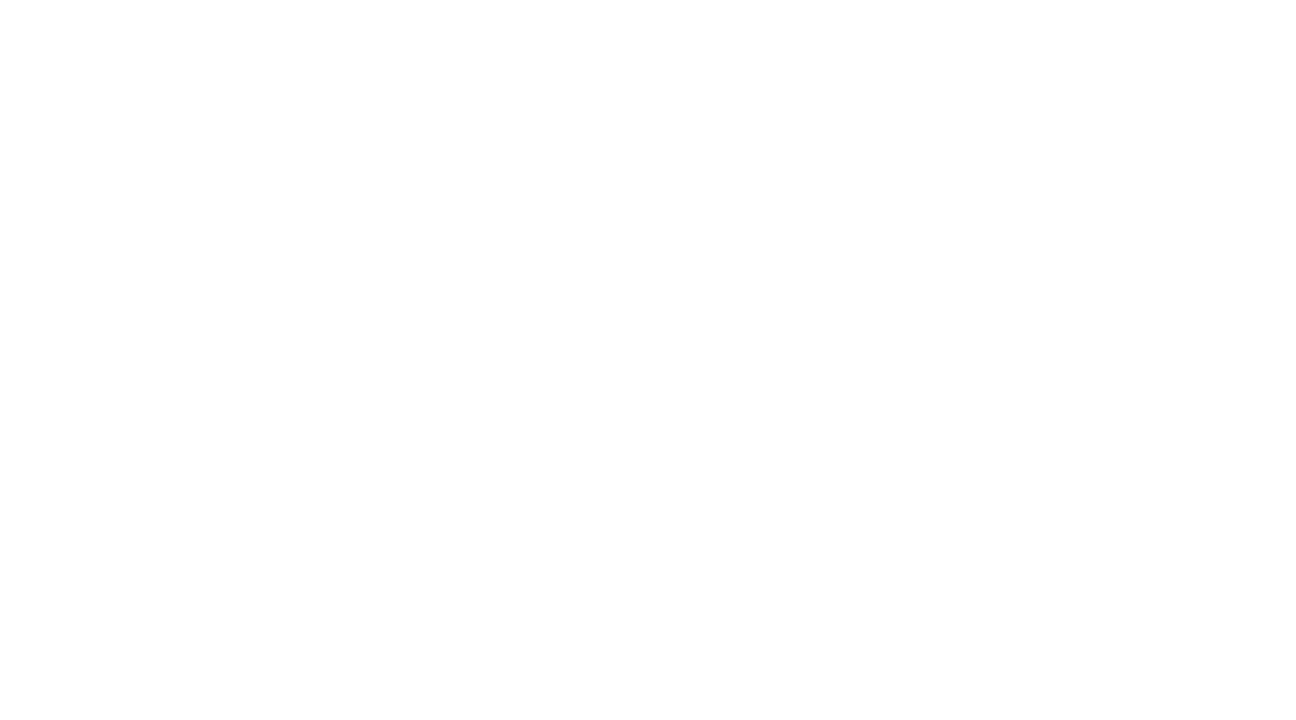

None

,bid,offer
DLR/ENE22,0.271417,0.285308
DLR/FEB22,0.411639,0.413674
DLR/MAR22,0.497326,0.498325
DLR/ABR22,0.502791,0.50378
DLR/MAY22,0.496367,0.499189
DLR/JUN22,0.495134,0.495681
DLR/JUL22,0.482786,0.487237
DLR/AGO22,0.469976,0.48726
DLR/SEP22,0.463877,0.469948
DLR/OCT22,0.453098,0.472053


In [50]:
# def plot_prices(prices):
#     plt.figure(figsize=(18,10))


#     x = futuros_dolar
#     y_bid = prices['bid'].loc[futuros_dolar]
#     y_offer = prices['offer'].loc[futuros_dolar]

#     plt.plot(x,y_bid, color='red', marker='o', label='Bid')
#     plt.plot(x,y_offer, color='green', marker='X', label='Offer')
#     # plt.scatter(tasas_futuros(prices.loc[['PAMP/FEB22', 'YPFD/FEB22', 'GGAL/FEB22']]),prices.loc[['PAMP/FEB22', 'YPFD/FEB22', 'GGAL/FEB22']])
#     # plt.figsize()


#     plt.title('Futuros')
#     plt.xlabel('Future Contract')
#     plt.ylabel('Precio')

#     plt.legend()
#     # plt.grid()
#     plt.tight_layout()
#     plt.show()

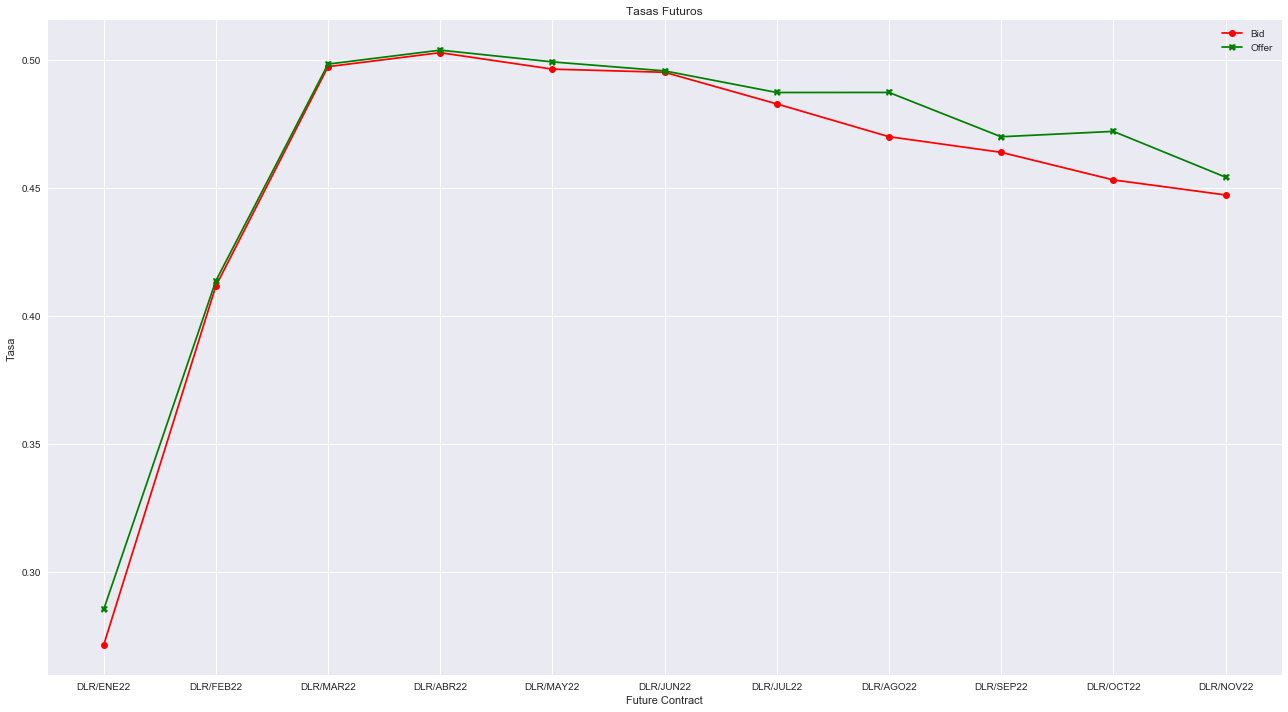

None

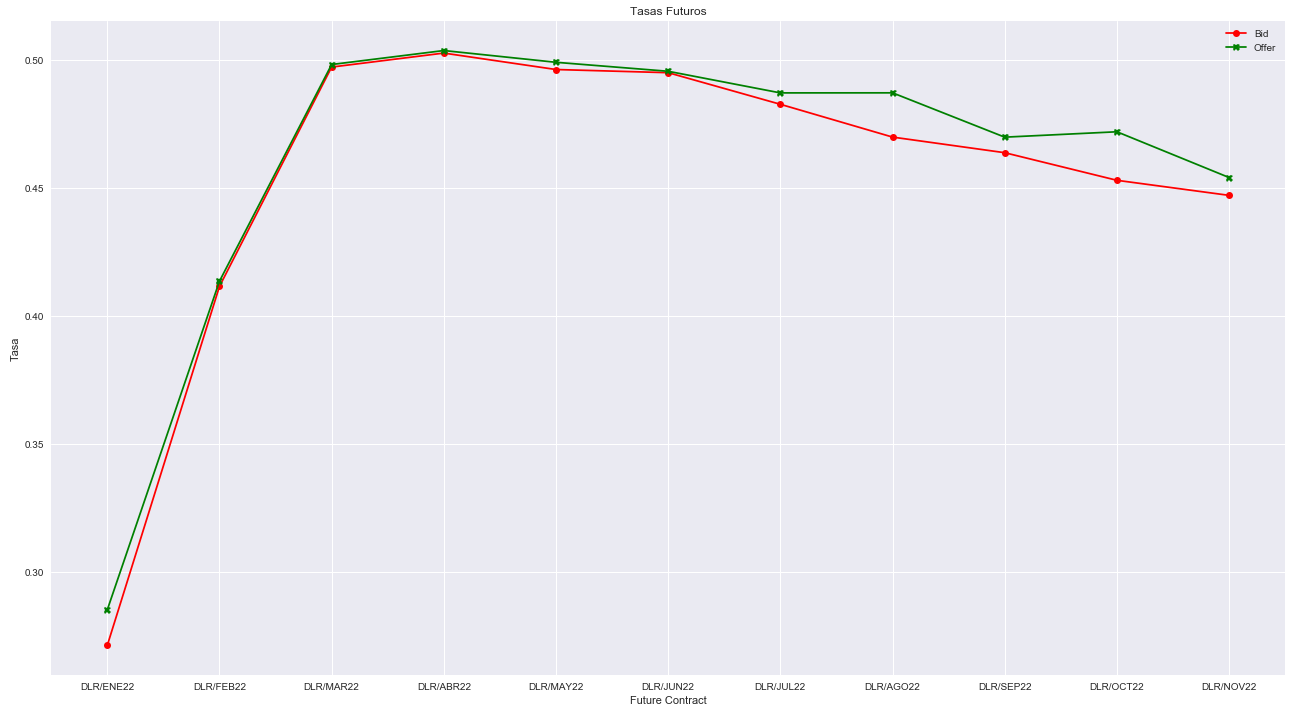

,bid,offer
DLR/ABR22-11,0.502791,"(DLR/FEB22, 0.413674)"
DLR/ABR22-19,0.502791,"(DLR/MAR22, 0.498325)"
DLR/ABR22-2,0.502791,"(DLR/ENE22, 0.285308)"
DLR/ABR22-20,0.502791,"(DLR/MAY22, 0.499189)"
DLR/ABR22-22,0.502791,"(DLR/JUN22, 0.495681)"
...,...,...
DLR/SEP22-16,0.463877,"(DLR/FEB22, 0.413674)"
DLR/SEP22-49,0.463877,"(DLR/NOV22, 0.454179)"
DLR/SEP22-57,0.463877,"(PAMP/FEB22, 0.284302)"
DLR/SEP22-68,0.463877,"(YPFD/FEB22, 0.255945)"


In [51]:
# plt.figure(figsize=(18,10))


# x = futuros_dolar
# y_bid = prices['bid'].loc[futuros_dolar]
# y_offer = prices['offer'].loc[futuros_dolar]

# plt.plot(x,y_bid, color='red', marker='o', label='Bid')
# plt.plot(x,y_offer, color='green', marker='X', label='Offer')
# # plt.plot(tasas_futuros(prices.loc[['PAMP/FEB22', 'YPFD/FEB22', 'GGAL/FEB22']]),prices.loc[['PAMP/FEB22', 'YPFD/FEB22', 'GGAL/FEB22']])
# # plt.figsize()


# plt.title('Futuros')
# plt.xlabel('Future Contract')
# plt.ylabel('Precio')

# plt.legend()
# # plt.grid()
# plt.tight_layout()
# plt.show()

In [52]:
# plt.style.available

In [53]:
# plt.figure(figsize=(18,10))
# plt.style.use('seaborn')

# x_fut = futuros_dolar
# y_bid_fut = tasas_futuros(prices)['bid'].loc[futuros_dolar]
# y_offer_fut = tasas_futuros(prices)['offer'].loc[futuros_dolar]

# plt.plot(x_fut,y_bid_fut, color='red', marker='o', label='Bid')
# plt.plot(x_fut,y_offer_fut, color='green', marker='X', label='Offer')


# plt.title('Tasas Futuros')
# plt.xlabel('Future Contract')
# plt.ylabel('Tasa')

# plt.legend()
# # plt.grid()
# plt.tight_layout()
# plt.show()

Market Data Message Received: {'type': 'Md', 'timestamp': 1643220052972, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/MAY22'}, 'marketData': {'BI': [{'price': 124.11, 'size': 100}], 'LA': {'price': 124.24, 'size': 3, 'date': 1643210332928}, 'OF': [{'price': 124.22, 'size': 2}]}}


,bid,offer,last
DLR/ENE22,105.09,105.11,105.11
DLR/FEB22,108.67,108.69,108.66
DLR/MAR22,114.24,114.26,114.16
DLR/ABR22,119.01,119.04,119.00
DLR/MAY22,124.11,124.22,124.24
DLR/JUN22,129.20,129.23,129.00
DLR/JUL22,133.55,133.85,130.00
DLR/AGO22,138.45,139.88,138.96
DLR/SEP22,143.31,143.90,NaN
DLR/OCT22,147.85,150.00,147.50


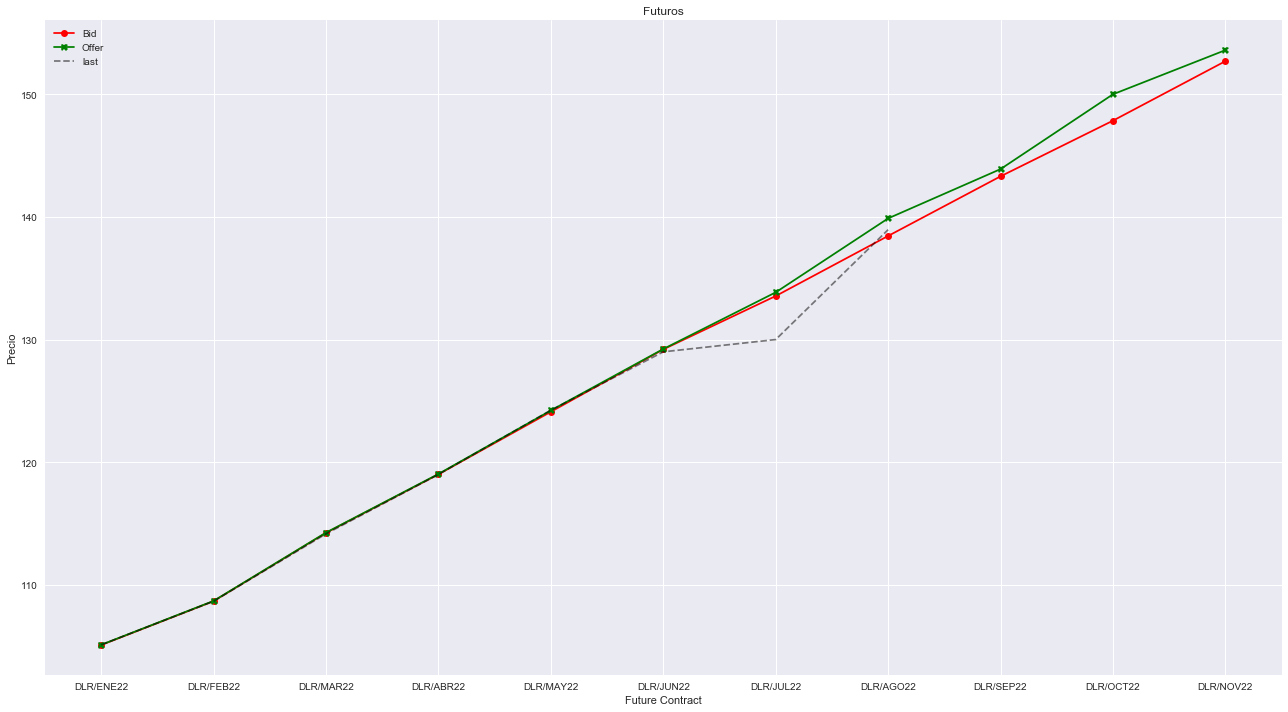

None

,bid,offer
DLR/ENE22,0.271417,0.285308
DLR/FEB22,0.411639,0.413674
DLR/MAR22,0.497326,0.498325
DLR/ABR22,0.502791,0.50378
DLR/MAY22,0.496602,0.499189
DLR/JUN22,0.495134,0.495681
DLR/JUL22,0.482786,0.487237
DLR/AGO22,0.469976,0.48726
DLR/SEP22,0.463877,0.469948
DLR/OCT22,0.453098,0.472053


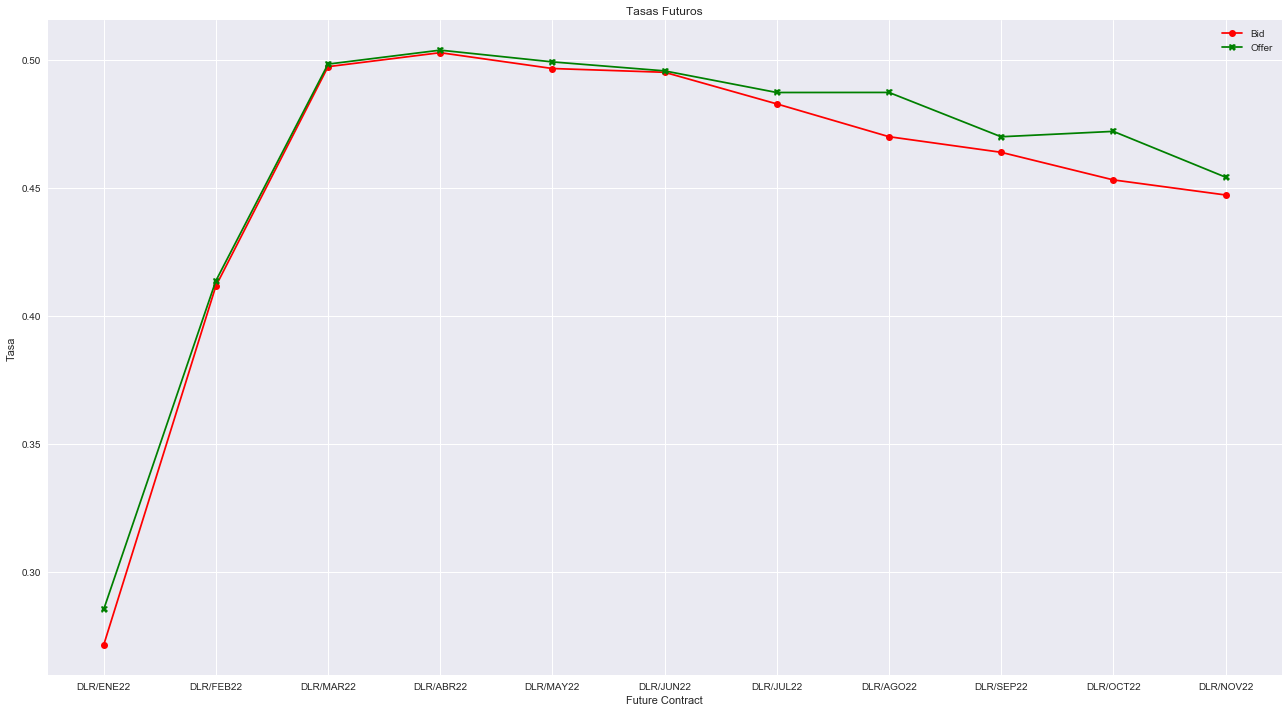

None

,bid,offer
DLR/ABR22-11,0.502791,"(DLR/FEB22, 0.413674)"
DLR/ABR22-19,0.502791,"(DLR/MAR22, 0.498325)"
DLR/ABR22-2,0.502791,"(DLR/ENE22, 0.285308)"
DLR/ABR22-20,0.502791,"(DLR/MAY22, 0.499189)"
DLR/ABR22-22,0.502791,"(DLR/JUN22, 0.495681)"
...,...,...
DLR/SEP22-16,0.463877,"(DLR/FEB22, 0.413674)"
DLR/SEP22-49,0.463877,"(DLR/NOV22, 0.454179)"
DLR/SEP22-57,0.463877,"(PAMP/FEB22, 0.284302)"
DLR/SEP22-68,0.463877,"(YPFD/FEB22, 0.255945)"


Market Data Message Received: {'type': 'Md', 'timestamp': 1643220054503, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/MAR22'}, 'marketData': {'BI': [{'price': 114.2, 'size': 1100}], 'LA': {'price': 114.16, 'size': 9, 'date': 1643214958209}, 'OF': [{'price': 114.26, 'size': 1440}]}}


,bid,offer,last
DLR/ENE22,105.09,105.11,105.11
DLR/FEB22,108.67,108.69,108.66
DLR/MAR22,114.20,114.26,114.16
DLR/ABR22,119.01,119.04,119.00
DLR/MAY22,124.11,124.22,124.24
DLR/JUN22,129.20,129.23,129.00
DLR/JUL22,133.55,133.85,130.00
DLR/AGO22,138.45,139.88,138.96
DLR/SEP22,143.31,143.90,NaN
DLR/OCT22,147.85,150.00,147.50


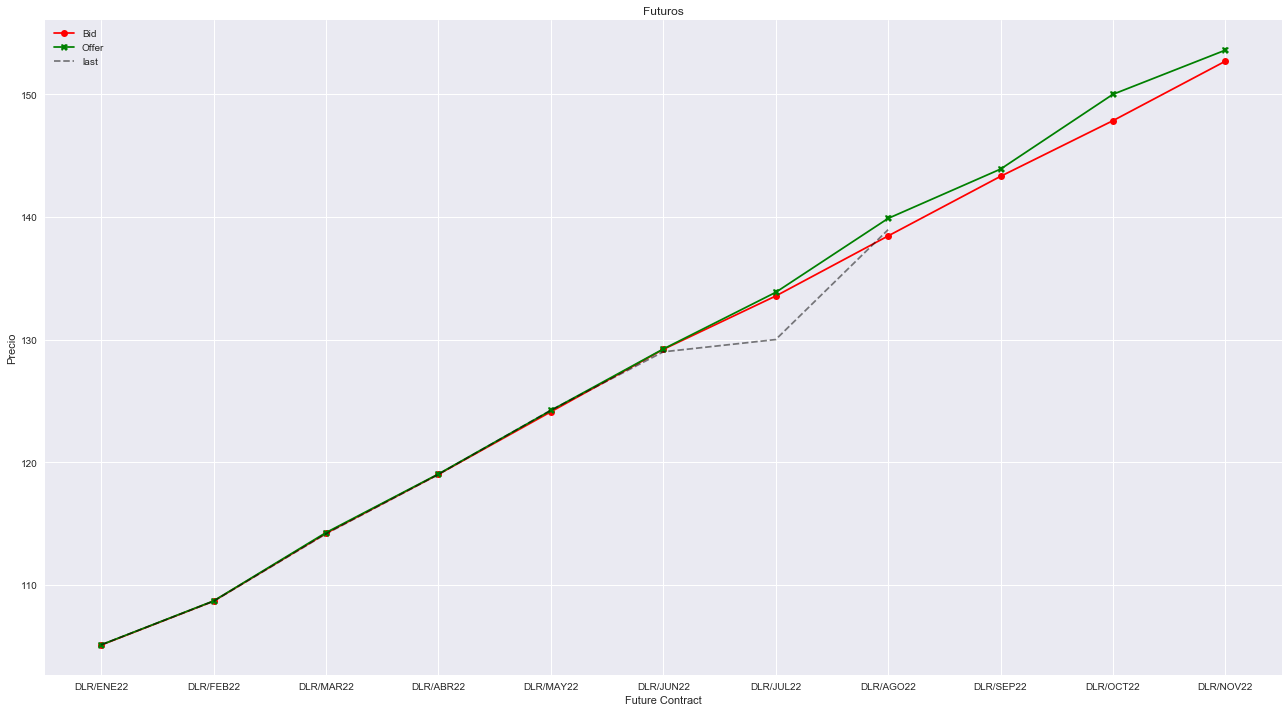

None

,bid,offer
DLR/ENE22,0.271417,0.285308
DLR/FEB22,0.411639,0.413674
DLR/MAR22,0.495329,0.498325
DLR/ABR22,0.502791,0.50378
DLR/MAY22,0.496602,0.499189
DLR/JUN22,0.495134,0.495681
DLR/JUL22,0.482786,0.487237
DLR/AGO22,0.469976,0.48726
DLR/SEP22,0.463877,0.469948
DLR/OCT22,0.453098,0.472053


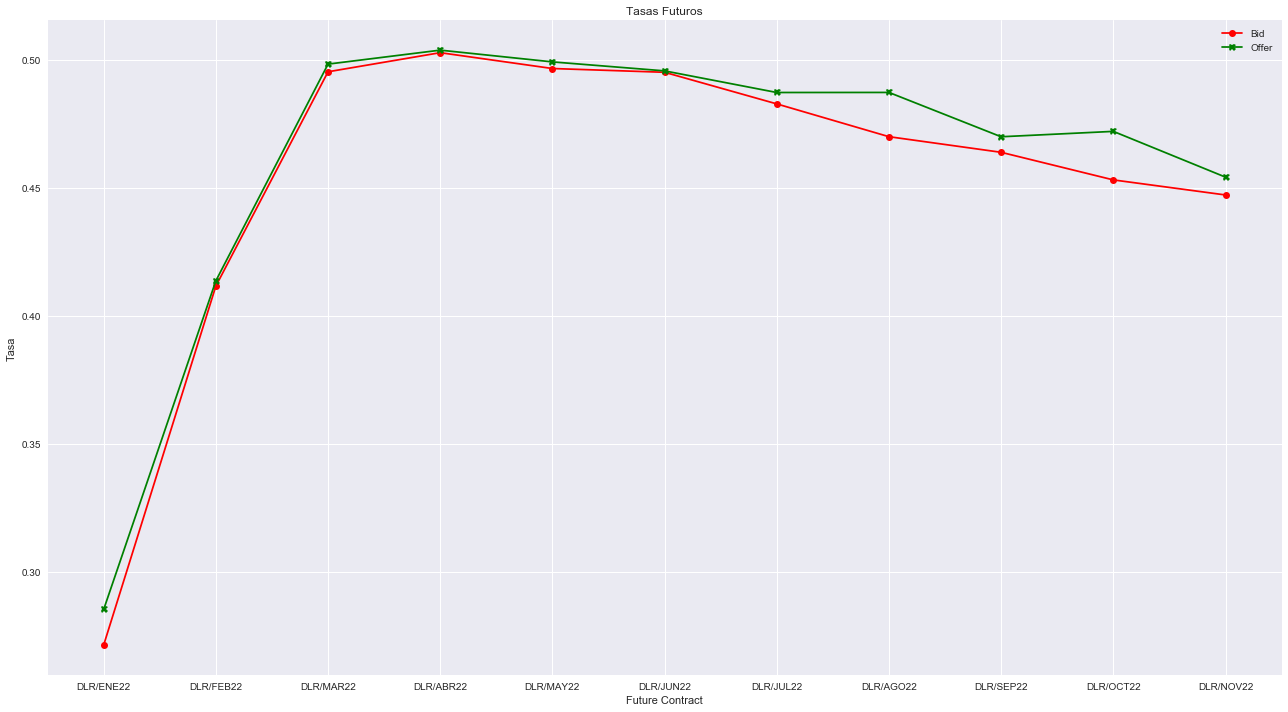

None

,bid,offer
DLR/ABR22-11,0.502791,"(DLR/FEB22, 0.413674)"
DLR/ABR22-19,0.502791,"(DLR/MAR22, 0.498325)"
DLR/ABR22-2,0.502791,"(DLR/ENE22, 0.285308)"
DLR/ABR22-20,0.502791,"(DLR/MAY22, 0.499189)"
DLR/ABR22-21,0.502791,"(DLR/JUN22, 0.495681)"
...,...,...
DLR/SEP22-16,0.463877,"(DLR/FEB22, 0.413674)"
DLR/SEP22-48,0.463877,"(DLR/NOV22, 0.454179)"
DLR/SEP22-56,0.463877,"(PAMP/FEB22, 0.284302)"
DLR/SEP22-67,0.463877,"(YPFD/FEB22, 0.255945)"


Market Data Message Received: {'type': 'Md', 'timestamp': 1643220056758, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'YPFD/FEB22'}, 'marketData': {'BI': [{'price': 930.6, 'size': 3}], 'LA': {'price': 933.35, 'size': 1, 'date': 1643220034124}, 'OF': [{'price': 933.35, 'size': 5}]}}


,bid,offer,last
DLR/ENE22,105.09,105.11,105.11
DLR/FEB22,108.67,108.69,108.66
DLR/MAR22,114.20,114.26,114.16
DLR/ABR22,119.01,119.04,119.00
DLR/MAY22,124.11,124.22,124.24
DLR/JUN22,129.20,129.23,129.00
DLR/JUL22,133.55,133.85,130.00
DLR/AGO22,138.45,139.88,138.96
DLR/SEP22,143.31,143.90,NaN
DLR/OCT22,147.85,150.00,147.50


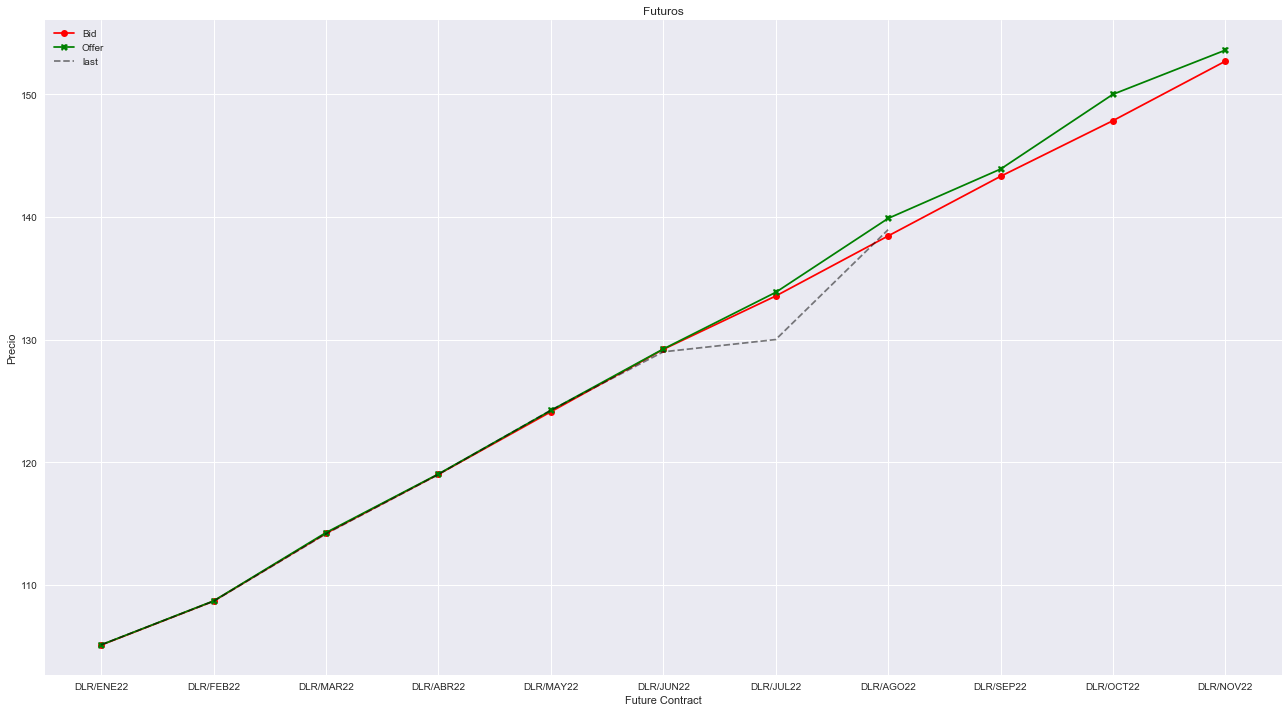

None

,bid,offer
DLR/ENE22,0.271417,0.285308
DLR/FEB22,0.411639,0.413674
DLR/MAR22,0.495329,0.498325
DLR/ABR22,0.502791,0.50378
DLR/MAY22,0.496602,0.499189
DLR/JUN22,0.495134,0.495681
DLR/JUL22,0.482786,0.487237
DLR/AGO22,0.469976,0.48726
DLR/SEP22,0.463877,0.469948
DLR/OCT22,0.453098,0.472053


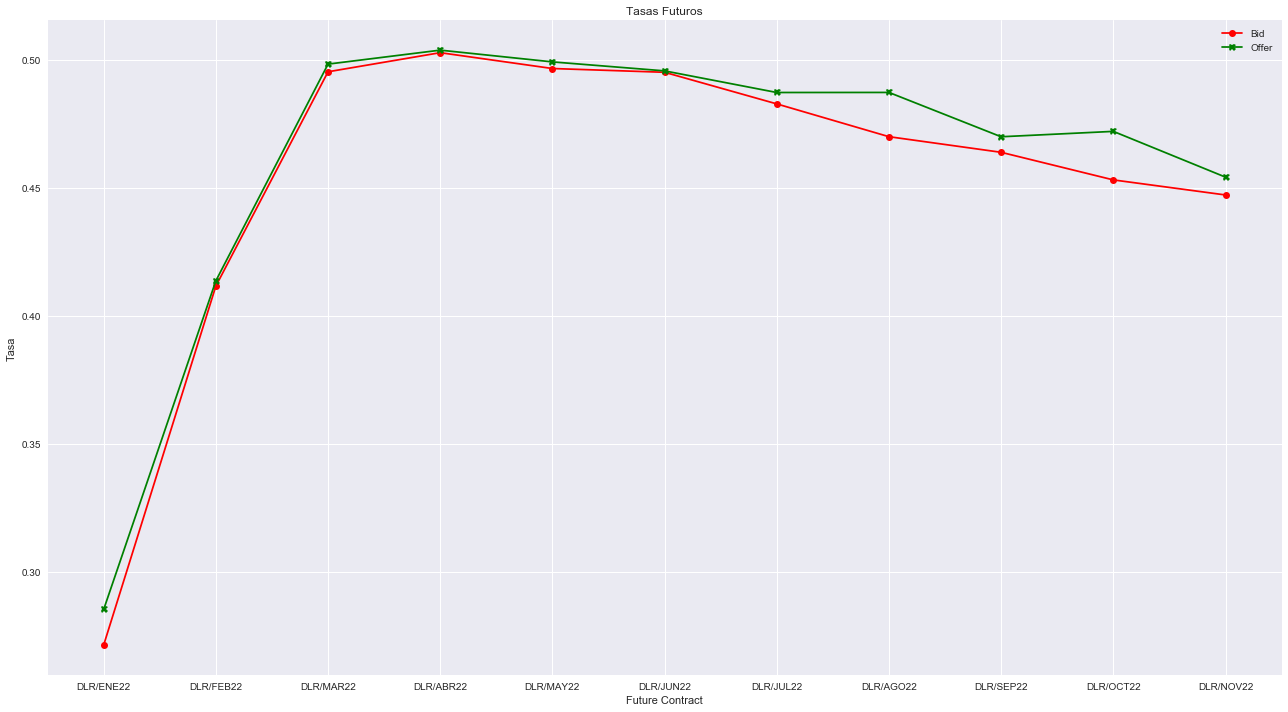

None

,bid,offer
DLR/ABR22-11,0.502791,"(DLR/FEB22, 0.413674)"
DLR/ABR22-19,0.502791,"(DLR/MAR22, 0.498325)"
DLR/ABR22-2,0.502791,"(DLR/ENE22, 0.285308)"
DLR/ABR22-20,0.502791,"(DLR/MAY22, 0.499189)"
DLR/ABR22-21,0.502791,"(DLR/JUN22, 0.495681)"
...,...,...
DLR/SEP22-16,0.463877,"(DLR/FEB22, 0.413674)"
DLR/SEP22-48,0.463877,"(DLR/NOV22, 0.454179)"
DLR/SEP22-56,0.463877,"(PAMP/FEB22, 0.284302)"
DLR/SEP22-67,0.463877,"(YPFD/FEB22, 0.255945)"


Market Data Message Received: {'type': 'Md', 'timestamp': 1643220058682, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/ENE22'}, 'marketData': {'BI': [{'price': 117.0, 'size': 4988}], 'LA': {'price': 105.11, 'size': 100, 'date': 1643220058652}, 'OF': []}}
Market Data Message Received: {'type': 'Md', 'timestamp': 1643220059211, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/ENE22'}, 'marketData': {'BI': [{'price': 105.09, 'size': 4097}], 'LA': {'price': 105.11, 'size': 100, 'date': 1643220058652}, 'OF': []}}
Market Data Message Received: {'type': 'Md', 'timestamp': 1643220088431, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'YPFD/FEB22'}, 'marketData': {'BI': [{'price': 930.6, 'size': 3}], 'LA': {'price': 933.35, 'size': 3, 'date': 1643220088396}, 'OF': [{'price': 933.35, 'size': 2}]}}


,bid,offer,last
DLR/ENE22,105.09,105.11,105.11
DLR/FEB22,108.67,108.69,108.66
DLR/MAR22,114.20,114.26,114.16
DLR/ABR22,119.01,119.04,119.00
DLR/MAY22,124.11,124.22,124.24
DLR/JUN22,129.20,129.23,129.00
DLR/JUL22,133.55,133.85,130.00
DLR/AGO22,138.45,139.88,138.96
DLR/SEP22,143.31,143.90,NaN
DLR/OCT22,147.85,150.00,147.50


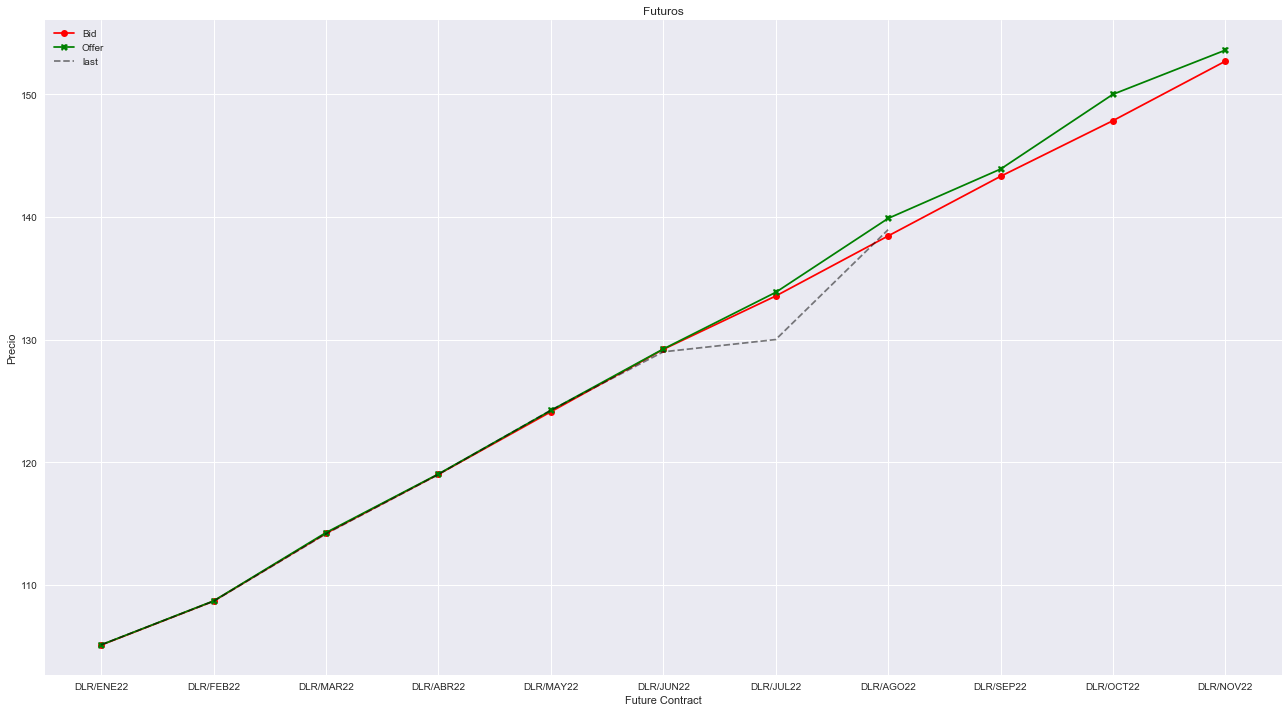

None

,bid,offer
DLR/ENE22,0.271417,0.285308
DLR/FEB22,0.411639,0.413674
DLR/MAR22,0.495329,0.498325
DLR/ABR22,0.502791,0.50378
DLR/MAY22,0.496602,0.499189
DLR/JUN22,0.495134,0.495681
DLR/JUL22,0.482786,0.487237
DLR/AGO22,0.469976,0.48726
DLR/SEP22,0.463877,0.469948
DLR/OCT22,0.453098,0.472053


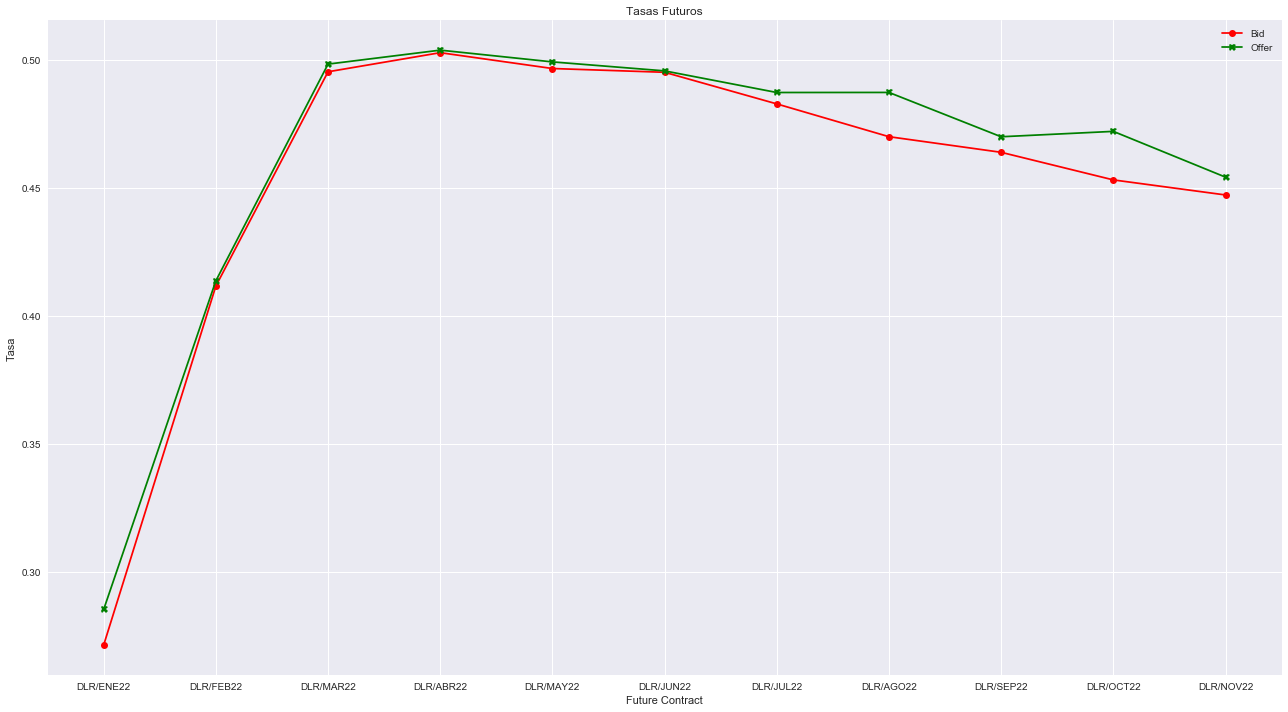

None

,bid,offer
DLR/ABR22-11,0.502791,"(DLR/FEB22, 0.413674)"
DLR/ABR22-19,0.502791,"(DLR/MAR22, 0.498325)"
DLR/ABR22-2,0.502791,"(DLR/ENE22, 0.285308)"
DLR/ABR22-20,0.502791,"(DLR/MAY22, 0.499189)"
DLR/ABR22-21,0.502791,"(DLR/JUN22, 0.495681)"
...,...,...
DLR/SEP22-16,0.463877,"(DLR/FEB22, 0.413674)"
DLR/SEP22-48,0.463877,"(DLR/NOV22, 0.454179)"
DLR/SEP22-56,0.463877,"(PAMP/FEB22, 0.284302)"
DLR/SEP22-67,0.463877,"(YPFD/FEB22, 0.255945)"


Market Data Message Received: {'type': 'Md', 'timestamp': 1643220107188, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/ENE22'}, 'marketData': {'BI': [{'price': 128.0, 'size': 1466}], 'LA': {'price': 105.11, 'size': 100, 'date': 1643220058652}, 'OF': []}}
Market Data Message Received: {'type': 'Md', 'timestamp': 1643220107613, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'DLR/ENE22'}, 'marketData': {'BI': [{'price': 105.09, 'size': 4097}], 'LA': {'price': 105.11, 'size': 100, 'date': 1643220058652}, 'OF': []}}
Market Data Message Received: {'type': 'Md', 'timestamp': 1643220114477, 'instrumentId': {'marketId': 'ROFX', 'symbol': 'YPFD/FEB22'}, 'marketData': {'BI': [{'price': 933.3, 'size': 3}], 'LA': {'price': 933.35, 'size': 3, 'date': 1643220088396}, 'OF': [{'price': 933.35, 'size': 2}]}}


,bid,offer,last
DLR/ENE22,105.09,105.11,105.11
DLR/FEB22,108.67,108.69,108.66
DLR/MAR22,114.20,114.26,114.16
DLR/ABR22,119.01,119.04,119.00
DLR/MAY22,124.11,124.22,124.24
DLR/JUN22,129.20,129.23,129.00
DLR/JUL22,133.55,133.85,130.00
DLR/AGO22,138.45,139.88,138.96
DLR/SEP22,143.31,143.90,NaN
DLR/OCT22,147.85,150.00,147.50


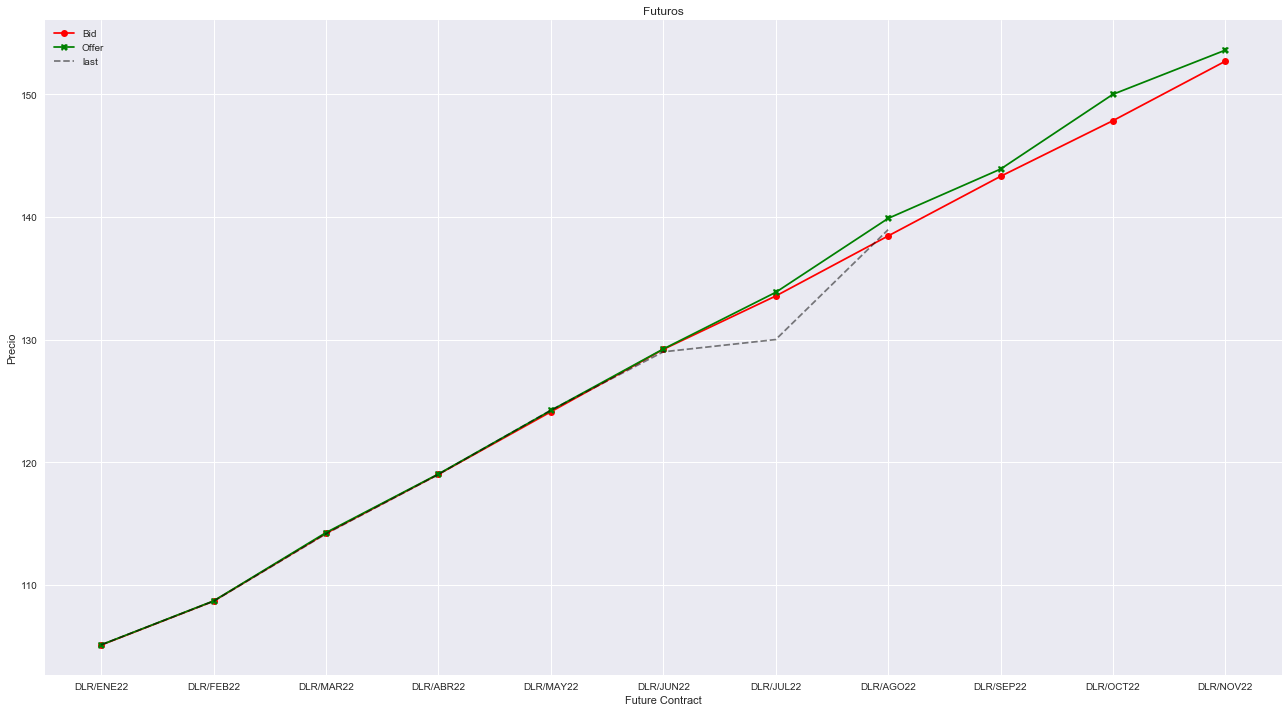

None

,bid,offer
DLR/ENE22,0.271417,0.285308
DLR/FEB22,0.411639,0.413674
DLR/MAR22,0.495329,0.498325
DLR/ABR22,0.502791,0.50378
DLR/MAY22,0.496602,0.499189
DLR/JUN22,0.495134,0.495681
DLR/JUL22,0.482786,0.487237
DLR/AGO22,0.469976,0.48726
DLR/SEP22,0.463877,0.469948
DLR/OCT22,0.453098,0.472053


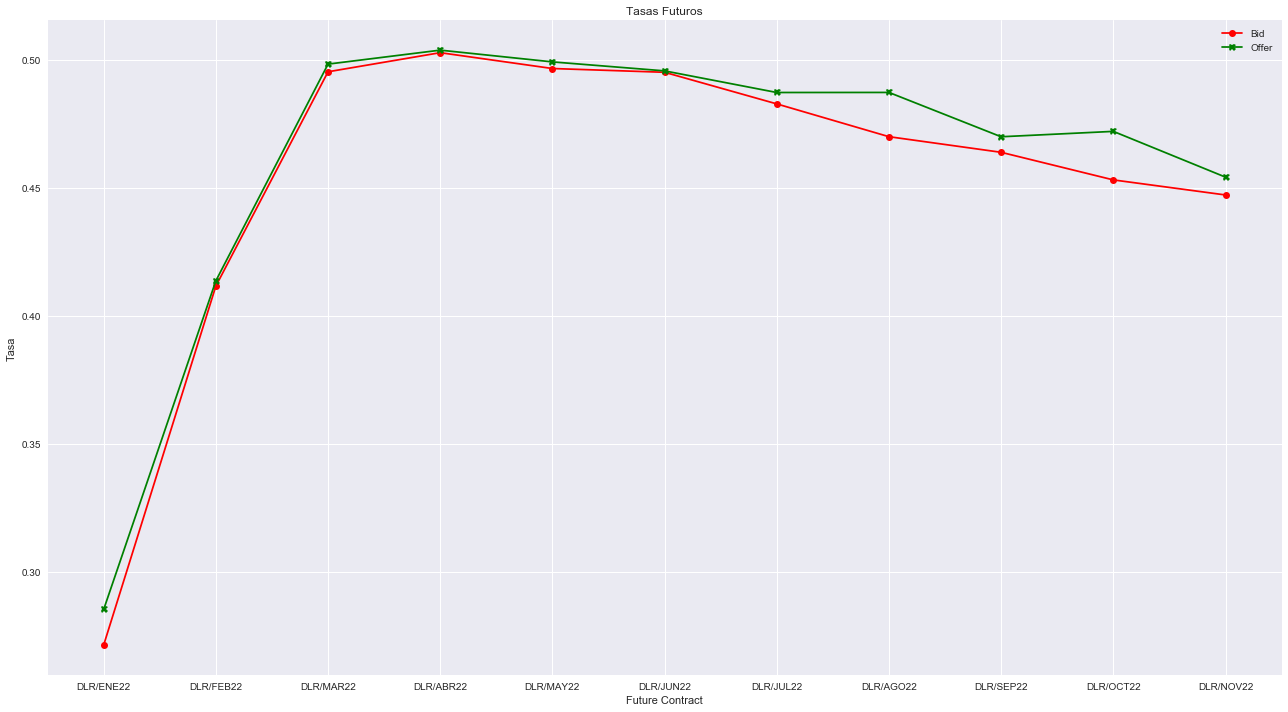

None

,bid,offer
DLR/ABR22-11,0.502791,"(DLR/FEB22, 0.413674)"
DLR/ABR22-19,0.502791,"(DLR/MAR22, 0.498325)"
DLR/ABR22-2,0.502791,"(DLR/ENE22, 0.285308)"
DLR/ABR22-20,0.502791,"(DLR/MAY22, 0.499189)"
DLR/ABR22-21,0.502791,"(DLR/JUN22, 0.495681)"
...,...,...
DLR/SEP22-16,0.463877,"(DLR/FEB22, 0.413674)"
DLR/SEP22-48,0.463877,"(DLR/NOV22, 0.454179)"
DLR/SEP22-56,0.463877,"(PAMP/FEB22, 0.284302)"
DLR/SEP22-67,0.463877,"(YPFD/FEB22, 0.255945)"


In [54]:
# def plot_tasas(tasas_futuros_df):
#     plt.figure(figsize=(18,10))
#     plt.style.use('seaborn')

#     x = futuros_dolar
#     y_bid = tasas_futuros_df['bid'].loc[futuros_dolar]
#     y_offer = tasas_futuros_df['offer'].loc[futuros_dolar]

#     plt.plot(x,y_bid, color='red', marker='o', label='Bid')
#     plt.plot(x,y_offer, color='green', marker='X', label='Offer')

#     plt.title('Tasas Futuros')
#     plt.xlabel('Future Contract')
#     plt.ylabel('Tasa')

#     plt.legend()
#     # plt.grid()
#     plt.tight_layout()
#     plt.show()